In [ ]:
df = pd.read_fwf('/newTWEET.txt',encoding='latin')

In [ ]:
df.columns = ["tweetid", "Timestamp", "time", "plus","Tweet","Unnamed1", "Unnamed2"]

In [ ]:
df.drop(["Unnamed1", "Unnamed2"],axis=1,inplace=True)

In [ ]:
df['Timestamp']= pd.to_datetime(df['Timestamp'], dayfirst=True, errors='coerce')

df['Timestamp']= pd.to_datetime(df['Timestamp'],dayfirst=True)

df["Timestamp"] = pd.to_datetime(df["Timestamp"])

In [ ]:
df['month_year'] = df['Timestamp'].dt.strftime('%b-%Y')
df ['year'] = pd.DatetimeIndex (df ['Timestamp']). year
df.head(1)

,tweetid,Timestamp,time,plus,Tweet,month_year,year
0,1377305967138836482,2021-03-31,18:05:06,0,<yungdaveGH> ITS OUT!!! YOUR NEW SUMMER NIGHTS...,Mar-2021,2021


In [ ]:
# Import stopwords
import nltk
from nltk.corpus import stopwords

# Import textblob
from textblob import Word, TextBlob

nltk.download('stopwords')
nltk.download('wordnet')
stop_words = stopwords.words('english')
custom_stopwords = ['rt', '#coronavirus']

import re
import string

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
def tweets(tweet):
    tweet = tweet.lower()
    tweet.replace('[^s\n\n]', '')
    tweet = re.sub('https?://\S+|www\.\S+', '', tweet)
    tweet = re.sub(r"[A-Za-z\.]*[0-9]+[A-Za-z%°\.]*", "", tweet)
    tweet = re.sub('\[.*?\]', '', tweet)
    tweet = re.sub('<.*?>+', '', tweet)
    tweet = re.sub(r"[,\!\?\%\(\)\/\"]", "", tweet)
    tweet = re.sub(r"\&\S*\s", "", tweet)
    tweet = re.sub(r"\&", "", tweet)
    tweet = re.sub(r"\+", "", tweet)
    tweet = re.sub(r"\#", "", tweet)
    tweet = re.sub(r"\$", "", tweet)
    tweet = re.sub(r"\£", "", tweet)
    tweet = re.sub(r"\%", "", tweet)
    tweet = re.sub(r"\:", "", tweet)
    tweet = re.sub(r"\@", "", tweet)
    tweet = re.sub(r"\-", "", tweet)
    tweet = re.sub('[%s]' % re.escape(string.punctuation), '', tweet)
    tweet = re.sub('\n', '', tweet)
    tweet = re.sub('\w*\d\w*', '', tweet)
    tweet = " ".join(word for word in tweet.split() if word not in stop_words)
    tweet = " ".join(Word(word).lemmatize() for word in tweet.split())
    return(tweet)
df['processed_tweet'] = df['Tweet'].astype(str).apply(lambda row: tweets(row))
#df['processed tweet'] = df['Tweet'].apply(lambda x: tweets(x, custom_stopwords))
df.head(10)

,tweetid,Timestamp,time,plus,Tweet,month_year,year,processed_tweet
0,1377305967138836482,2021-03-31,18:05:06,0,<yungdaveGH> ITS OUT!!! YOUR NEW SUMMER NIGHTS...,Mar-2021,2021,new summer night favouritego stream youtube un...
1,1377218238992445443,2021-03-31,12:16:30,0,<BlueChipIT> So blame the government rather th...,Mar-2021,2021,blame government rather parent committed crime...
2,1377202645975195648,2021-03-31,11:14:32,0,<BritishHeraldUK> After a major plunge due to ...,Mar-2021,2021,major plunge due coronavirus britainâs econo...
3,1377194242393657346,2021-03-31,10:41:09,0,"<FelixxMoritz> Well, I guess itâs time to ex...",Mar-2021,2021,well guess itâs time explore uk ban leaving ...
4,1377186411929948162,2021-03-31,10:10:02,0,<E7Drew> @SBurke10 @BBCNews Try reading the St...,Mar-2021,2021,bbcnews try reading statutory instrument coron...
5,1377172069079642112,2021-03-31,09:13:02,0,<dawnvhardy> @BBCNews All Doctors and Nurses w...,Mar-2021,2021,bbcnews doctor nurse exposed coronavirus sayin...
6,1377166255208030210,2021-03-31,08:49:56,0,<beecee> BIG DAY! Second vaccination for me an...,Mar-2021,2021,big day second vaccination mother morningcommu...
7,1377106144422887424,2021-03-31,04:51:04,0,<Pairsonnalites> Coronavirus vaccine priority ...,Mar-2021,2021,coronavirus vaccine priority list changed bloo...
8,1377045099998277638,2021-03-31,00:48:30,0,<FatimaDuerden> @DrewLawDesign Coronavirus,Mar-2021,2021,drewlawdesign coronavirus
9,1377016806154543105,2021-03-30,22:56:04,0,<Pairsonnalites> Lloyds Pharmacy to launch UK'...,Mar-2021,2021,lloyd pharmacy launch uk first ever coronaviru...


In [ ]:
def remove_emoji(tweet):

  EMOJI_PATTERN = re.compile(
    "(["
    "\U0001F1E0-\U0001F1FF"  # flags (iOS)
    "\U0001F300-\U0001F5FF"  # symbols & pictographs
    "\U0001F600-\U0001F64F"  # emoticons
    "\U0001F680-\U0001F6FF"  # transport & map symbols
    "\U0001F700-\U0001F77F"  # alchemical symbols
    "\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
    "\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
    "\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
    "\U0001FA00-\U0001FA6F"  # Chess Symbols
    "\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
    "\U00002702-\U000027B0"  # Dingbats
    "])"
  )
  tweet = re.sub(EMOJI_PATTERN, r' \1 ', tweet)
  return tweet

In [ ]:
# Calculate polarity
def get_sentiment(Tweet):
    blob = TextBlob(Tweet)
    sentiment_polarity = blob.sentiment.polarity
    sentiment_subjectivity = blob.sentiment.subjectivity
    if sentiment_polarity > 0:
        sentiment_label = 'Positive'
    elif sentiment_polarity < 0:
        sentiment_label = 'Negative'
    else:
        sentiment_label = 'Neutral'
    result = {'polarity':sentiment_polarity,
              'subjectivity':sentiment_subjectivity,
              'sentiment':sentiment_label}
    return result
#df['polarity'] = df['processed tweet'].apply(lambda x: TextBlob(x).sentiment[0])
#df['subjectivity'] = df['processed tweet'].apply(lambda x: TextBlob(x).sentiment[1])
#df.head()

In [ ]:
ex1 = df['processed_tweet'].iloc[0]

In [ ]:
get_sentiment(ex1)

{'polarity': 0.13636363636363635,
 'sentiment': 'Positive',
 'subjectivity': 0.45454545454545453}

In [ ]:
df['sentiment_results'] = df['processed_tweet'].apply(get_sentiment)
df['sentiment_results']

0       {'polarity': 0.13636363636363635, 'subjectivit...
1       {'polarity': 0.0, 'subjectivity': 0.0, 'sentim...
2       {'polarity': -0.020833333333333332, 'subjectiv...
3       {'polarity': 0.06818181818181818, 'subjectivit...
4       {'polarity': -0.08888888888888889, 'subjectivi...
                              ...                        
4038    {'polarity': 0.0, 'subjectivity': 0.0, 'sentim...
4039    {'polarity': 0.55, 'subjectivity': 1.0, 'senti...
4040    {'polarity': -0.6, 'subjectivity': 0.9, 'senti...
4041    {'polarity': -0.0875, 'subjectivity': 0.2375, ...
4042    {'polarity': 0.0, 'subjectivity': 0.0, 'sentim...
Name: sentiment_results, Length: 4043, dtype: object

In [ ]:
df['sentiment_results'].iloc[1]

{'polarity': 0.0, 'sentiment': 'Neutral', 'subjectivity': 0.0}

In [ ]:
pd.json_normalize(df['sentiment_results'].iloc[1])

,polarity,subjectivity,sentiment
0,0.0,0.0,Neutral


In [ ]:
df = df.join(pd.json_normalize(df['sentiment_results']))

In [ ]:
df = df[['sentiment', 'polarity', 'processed_tweet', 'Timestamp', 'month_year']]
df

,sentiment,polarity,processed_tweet,Timestamp,month_year
0,Positive,0.136364,new summer night favouritego stream youtube un...,2021-03-31,Mar-2021
1,Neutral,0.000000,blame government rather parent committed crime...,2021-03-31,Mar-2021
2,Negative,-0.020833,major plunge due coronavirus britainâs econo...,2021-03-31,Mar-2021
3,Positive,0.068182,well guess itâs time explore uk ban leaving ...,2021-03-31,Mar-2021
4,Negative,-0.088889,bbcnews try reading statutory instrument coron...,2021-03-31,Mar-2021
...,...,...,...,...,...
4038,Neutral,0.000000,saturday cookalong lunchtime morningcommute we...,2020-10-24,Oct-2020
4039,Positive,0.550000,greatest coronavirus poem far ð,2020-10-24,Oct-2020
4040,Negative,-0.600000,crazy reading book stop coronavirus,2020-10-24,Oct-2020
4041,Negative,-0.087500,prep clinic northern ireland âindefinitelyâ...,2020-10-24,Oct-2020


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
#from keras.utils import to_categorical
from tensorflow.keras.utils import to_categorical

from keras.callbacks import EarlyStopping
%matplotlib inline



In [ ]:
X = df.processed_tweet
Y = df.sentiment
le = LabelEncoder()
Y = le.fit_transform(Y)
Y = Y.reshape(-1,1)

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.15)


In [ ]:
max_words = 1000
max_len = 150
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(X_train)
sequences = tok.texts_to_sequences(X_train)
sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)

In [ ]:
df.head()

,sentiment,polarity,processed_tweet,Timestamp,month_year
0,Positive,0.136364,new summer night favouritego stream youtube un...,2021-03-31,Mar-2021
1,Neutral,0.000000,blame government rather parent committed crime...,2021-03-31,Mar-2021
2,Negative,-0.020833,major plunge due coronavirus britainâs econo...,2021-03-31,Mar-2021
3,Positive,0.068182,well guess itâs time explore uk ban leaving ...,2021-03-31,Mar-2021
4,Negative,-0.088889,bbcnews try reading statutory instrument coron...,2021-03-31,Mar-2021


In [ ]:
# libraries

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
np.random.seed(32)


from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.manifold import TSNE

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import LSTM, Conv1D, MaxPooling1D, Dropout
from keras.utils.np_utils import to_categorical


%matplotlib inline

In [ ]:
train_text, test_text, train_y, test_y = train_test_split(df['processed_tweet'],df['polarity'],test_size = 0.2)

In [ ]:
train_text.shape

(3234,)

In [ ]:
MAX_NB_WORDS = 20000

# get the raw text data
texts_train = train_text.astype(str)
texts_test = test_text.astype(str)

# finally, vectorize the text samples into a 2D integer tensor
tokenizer = Tokenizer(nb_words=MAX_NB_WORDS, char_level=False)
tokenizer.fit_on_texts(texts_train)
sequences = tokenizer.texts_to_sequences(texts_train)
sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)

sequences_test = tokenizer.texts_to_sequences(texts_test)
test_sequences_matrix = sequence.pad_sequences(sequences_test,maxlen=max_len)


word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 11851 unique tokens.


/usr/local/lib/python3.7/dist-packages/keras_preprocessing/text.py:180: UserWarning: The `nb_words` argument in `Tokenizer` has been renamed `num_words`.
  warnings.warn('The `nb_words` argument in `Tokenizer` '


In [ ]:
sequences[0]

[337,
 189,
 928,
 6,
 1858,
 279,
 1530,
 3,
 403,
 142,
 1140,
 560,
 1141,
 4575,
 352,
 13,
 784,
 229,
 300,
 1,
 29,
 10,
 161,
 3]

In [ ]:
type(tokenizer.word_index), len(tokenizer.word_index)

(dict, 11851)

In [ ]:
index_to_word = dict((i, w) for w, i in tokenizer.word_index.items())

In [ ]:
" ".join([index_to_word[i] for i in sequences[0]])

'three every hundred people asked quarantine arrive uk actually face check thats simply sufficient taken year realise south africa coronavirus variant case found uk'

In [ ]:
seq_lens = [len(s) for s in sequences]
print("average length: %0.1f" % np.mean(seq_lens))
print("max length: %d" % max(seq_lens))

average length: 16.2
max length: 48


In [ ]:
MAX_SEQUENCE_LENGTH = 150

# pad sequences with 0s
x_train = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)
x_test = pad_sequences(sequences_test, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', x_train.shape)
print('Shape of data test tensor:', x_test.shape)

Shape of data tensor: (3234, 150)
Shape of data test tensor: (809, 150)


In [ ]:
y_train = train_y
y_test = test_y

y_train = to_categorical(np.asarray(y_train))
print('Shape of label tensor:', test_y.shape)

Shape of label tensor: (809,)


In [ ]:
from keras.layers import Dense, Input, Flatten
from keras.layers import GlobalAveragePooling1D, Embedding
from keras.models import Model

EMBEDDING_DIM = 50
N_CLASSES = 2
#CNN avec la couche de poling
# input: a sequence of MAX_SEQUENCE_LENGTH integers
sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')

embedding_layer = Embedding(MAX_NB_WORDS, EMBEDDING_DIM,
                            input_length=MAX_SEQUENCE_LENGTH,
                            trainable=True)
embedded_sequences = embedding_layer(sequence_input)
#L'utilisation du bloc de mise en commun 1D Global average peut remplacer les blocs entièrement connectés de votre CNN.
average = GlobalAveragePooling1D()(embedded_sequences)
predictions = Dense(N_CLASSES, activation='softmax')(average)

model_1 = Model(sequence_input, predictions)
model_1.compile(loss='categorical_crossentropy',
              optimizer='adam', metrics=['acc'])
model_1.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150)]             0         
_________________________________________________________________
embedding (Embedding)        (None, 150, 50)           1000000   
_________________________________________________________________
global_average_pooling1d (Gl (None, 50)                0         
_________________________________________________________________
dense (Dense)                (None, 2)                 102       
Total params: 1,000,102
Trainable params: 1,000,102
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model_1.fit(x_train, y_train, validation_split=0.1,
          epochs=10, batch_size=128, verbose=2)

Epoch 1/10
23/23 - 0s - loss: 0.0305 - acc: 0.9945 - val_loss: 0.0053 - val_acc: 1.0000
Epoch 2/10
23/23 - 0s - loss: 0.0304 - acc: 0.9945 - val_loss: 0.0052 - val_acc: 1.0000
Epoch 3/10
23/23 - 0s - loss: 0.0303 - acc: 0.9945 - val_loss: 0.0053 - val_acc: 1.0000
Epoch 4/10
23/23 - 0s - loss: 0.0302 - acc: 0.9945 - val_loss: 0.0052 - val_acc: 1.0000
Epoch 5/10
23/23 - 0s - loss: 0.0301 - acc: 0.9945 - val_loss: 0.0052 - val_acc: 1.0000
Epoch 6/10
23/23 - 0s - loss: 0.0300 - acc: 0.9945 - val_loss: 0.0053 - val_acc: 1.0000
Epoch 7/10
23/23 - 0s - loss: 0.0299 - acc: 0.9945 - val_loss: 0.0052 - val_acc: 1.0000
Epoch 8/10
23/23 - 0s - loss: 0.0298 - acc: 0.9945 - val_loss: 0.0052 - val_acc: 1.0000
Epoch 9/10
23/23 - 0s - loss: 0.0297 - acc: 0.9945 - val_loss: 0.0052 - val_acc: 1.0000
Epoch 10/10
23/23 - 0s - loss: 0.0296 - acc: 0.9945 - val_loss: 0.0052 - val_acc: 1.0000


In [ ]:
##

In [ ]:
plt.plot(history1.history['loss'], label='training data')
plt.plot(history1.history['val_loss'], label='testing data')
plt.title('Loss for Text Classification')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

NameError: ignored

In [ ]:
#plt.plot(history1.history['accuracy'], label='training data')
plt.plot(history1.history['acc'], label='training')

#plt.plot(history1.history['val_accuracy'], label='validation data')
plt.plot(history1.history['val_acc'], label='testing')

plt.title('CategoricalAccuracy for Text Classification')
plt.ylabel('CategoricalAccuracy value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

NameError: ignored

In [ ]:
import tensorflow as tf
tf.keras.utils.plot_model(model_1, "simpleNN_model.png", show_shapes=True)

In [ ]:
# input: a sequence of MAX_SEQUENCE_LENGTH integers
#model LSTM Pure
sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
embedded_sequences = embedding_layer(sequence_input)

x = LSTM(128, dropout=0.2, recurrent_dropout=0.2)(embedded_sequences)
predictions = Dense(2, activation='softmax')(x)


model_2 = Model(sequence_input, predictions)
model_2.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['acc'])
model_2.summary()


In [ ]:
history2 = model_2.fit(x_train, y_train, validation_split=0.1,
          epochs=10, batch_size=128,verbose=1)

Epoch 1/10
236/236 [==============================] - 189s 789ms/step - loss: 0.0535 - acc: 0.9729 - val_loss: 0.0672 - val_acc: 0.9910
Epoch 2/10
236/236 [==============================] - 183s 776ms/step - loss: 0.0045 - acc: 0.9985 - val_loss: 0.0495 - val_acc: 0.9904
Epoch 3/10
236/236 [==============================] - 182s 771ms/step - loss: 0.0043 - acc: 0.9989 - val_loss: 0.0701 - val_acc: 0.9910
Epoch 4/10
236/236 [==============================] - 181s 768ms/step - loss: 0.0031 - acc: 0.9991 - val_loss: 0.0761 - val_acc: 0.9913
Epoch 5/10
236/236 [==============================] - 181s 767ms/step - loss: 0.0023 - acc: 0.9994 - val_loss: 0.0752 - val_acc: 0.9907
Epoch 6/10
236/236 [==============================] - 184s 778ms/step - loss: 0.0015 - acc: 0.9997 - val_loss: 0.0715 - val_acc: 0.9910
Epoch 7/10
236/236 [==============================] - 183s 774ms/step - loss: 0.0016 - acc: 0.9994 - val_loss: 0.0786 - val_acc: 0.9910
Epoch 8/10
236/236 [============================

In [ ]:
###

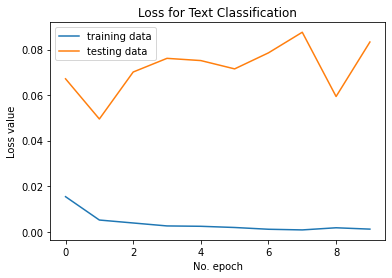

In [ ]:
plt.plot(history2.history['loss'], label='training data')
plt.plot(history2.history['val_loss'], label='testing data')
plt.title('Loss for Text Classification')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

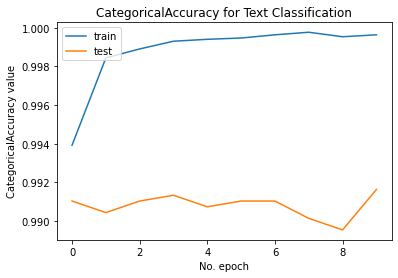

In [ ]:
#plt.plot(history1.history['accuracy'], label='training data')
plt.plot(history2.history['acc'], label='train')

#plt.plot(history1.history['val_accuracy'], label='validation data')
plt.plot(history2.history['val_acc'], label='test')

plt.title('CategoricalAccuracy for Text Classification')
plt.ylabel('CategoricalAccuracy value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

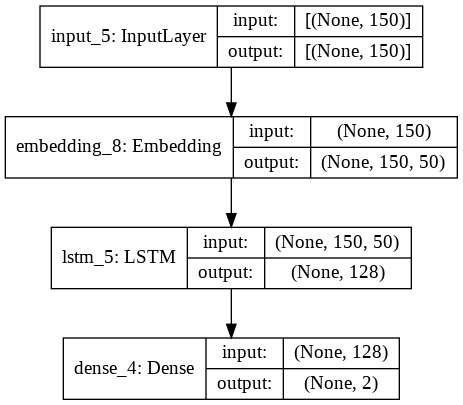

In [ ]:
tf.keras.utils.plot_model(model_2, "simpleNN_model.png", show_shapes=True)

In [ ]:
#CNN model using LSTM Layer
# input: a sequence of MAX_SEQUENCE_LENGTH integers
sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
embedded_sequences = embedding_layer(sequence_input)

# 1D convolution with 64 output channels
x = Conv1D(64, 5)(embedded_sequences)
# MaxPool divides the length of the sequence by 5
x = MaxPooling1D(5)(x)
x = Dropout(0.2)(x)
x = Conv1D(64, 5)(x)
x = MaxPooling1D(5)(x)
# LSTM layer with a hidden size of 64
x = Dropout(0.2)(x)
x = LSTM(64)(x)
predictions = Dense(2, activation='softmax')(x)

model_3 = Model(sequence_input, predictions)
model_3.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['acc'])
model_3.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 150)]             0         
_________________________________________________________________
embedding (Embedding)        (None, 150, 50)           1000000   
_________________________________________________________________
conv1d (Conv1D)              (None, 146, 64)           16064     
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 29, 64)            0         
_________________________________________________________________
dropout (Dropout)            (None, 29, 64)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 25, 64)            20544     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 5, 64)             0   

In [ ]:
history3 = model_3.fit(x_train, y_train, validation_split=0.6,
          epochs=10, batch_size=128)

Epoch 1/10
11/11 [==============================] - 1s 73ms/step - loss: 0.0049 - acc: 0.9992 - val_loss: 0.0097 - val_acc: 0.9979
Epoch 2/10
11/11 [==============================] - 0s 22ms/step - loss: 0.0052 - acc: 0.9992 - val_loss: 0.0095 - val_acc: 0.9979
Epoch 3/10
11/11 [==============================] - 0s 22ms/step - loss: 0.0050 - acc: 0.9992 - val_loss: 0.0087 - val_acc: 0.9985
Epoch 4/10
11/11 [==============================] - 0s 22ms/step - loss: 0.0064 - acc: 0.9985 - val_loss: 0.0089 - val_acc: 0.9985
Epoch 5/10
11/11 [==============================] - 0s 21ms/step - loss: 0.0048 - acc: 0.9992 - val_loss: 0.0092 - val_acc: 0.9985
Epoch 6/10
11/11 [==============================] - 0s 20ms/step - loss: 0.0103 - acc: 0.9992 - val_loss: 0.0098 - val_acc: 0.9985
Epoch 7/10
11/11 [==============================] - 0s 21ms/step - loss: 0.0028 - acc: 0.9992 - val_loss: 0.0104 - val_acc: 0.9979
Epoch 8/10
11/11 [==============================] - 0s 21ms/step - loss: 0.0020 - a

In [ ]:
##

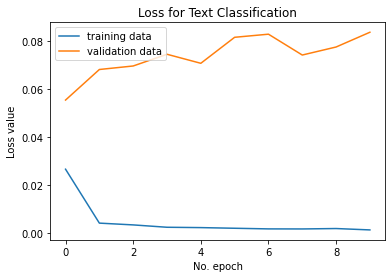

In [ ]:
plt.plot(history3.history['loss'], label='training data')
plt.plot(history3.history['val_loss'], label='validation data')
plt.title('Loss for Text Classification')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

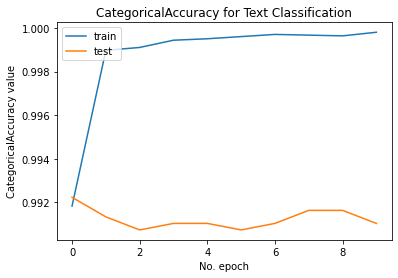

In [ ]:
#plt.plot(history1.history['accuracy'], label='training data')
plt.plot(history3.history['acc'], label='training data')

#plt.plot(history1.history['val_accuracy'], label='validation data')
plt.plot(history3.history['val_acc'], label='validation data')

plt.title('CategoricalAccuracy for Text Classification')
plt.ylabel('CategoricalAccuracy value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

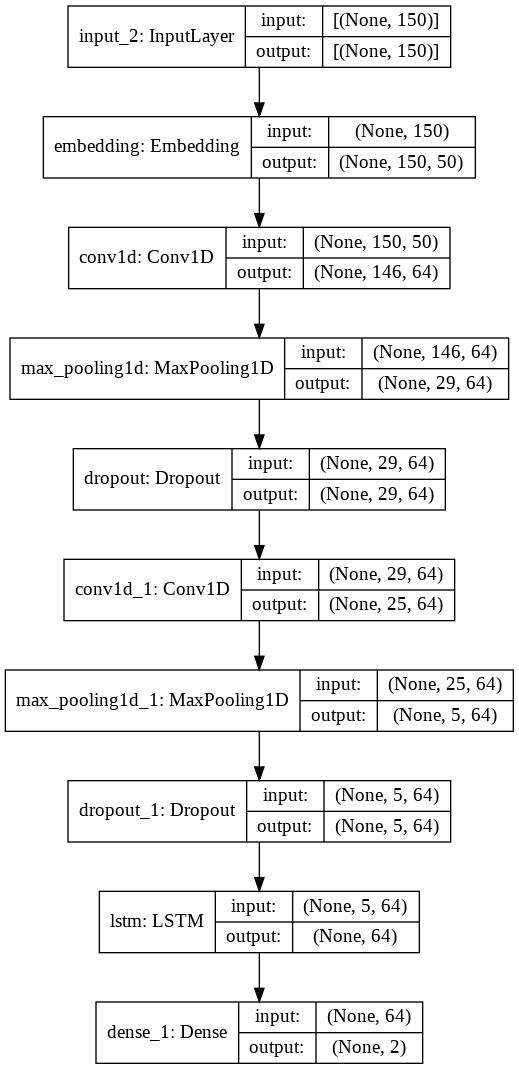

In [ ]:
#Converts a Keras model to dot format and save to a file.

tf.keras.utils.plot_model(model_3, "simpleNN_model.png", show_shapes=True)

In [ ]:

from prettytable import PrettyTable
table = PrettyTable()
table.field_names = ['Model', 'Accuracy %']
table.add_row(['RNN', 42.3])

table.add_row(['CNN using couche poling', 99.98])

table.add_row(['CNN using LSTM', 99.16])

table.add_row(['CNN unsing couche convolution ', 99.22])


print(table)

+--------------------------------+------------+
|             Model              | Accuracy % |
+--------------------------------+------------+
|              RNN               |    42.3    |
|    CNN using couche poling     |   99.98    |
|         CNN using LSTM         |   99.16    |
| CNN unsing couche convolution  |   99.22    |
+--------------------------------+------------+
